# Coordinate descent

Coordinate descent is a widely used optimization method.

We let $f: \mathbb{R}^p \to \mathbb{R}$. Coordinate descent tries to minimize $f$ alternatively with respect to individual coordinates.

We denote $w^t$ the iterates. At iteration $t$, we chose an index $i \in \{1, \dots, p\}$ and try to minimize $f$ with respect to $w_i^t$ without changing the other coordinates $w_j^t$, $j\neq i$. More formally, we define $\phi_i(x, w) = f(w_1, \dots, w_{i-1}, x, w_{i+1}, w_p)$ and set (ideally) at each iteration: 

$$
w_i^{t+1} = \arg\min_x \phi_i(x, w^t) \enspace \text{and} \enspace w_j^{t+1} = w_j^t \enspace \text{for} \enspace j\neq i
$$

The index $i$ is typically chosen as cyclic : $i =1 + (t \mod p)$. Therefore , at iteration $1$, the coordinate $1$ is updated, at iteration $2$, the coordinate $2$ is updated, ... , at iteration $p$ the coordinate $p$ is updated, and at iteration $p+1$ the coordinate $1$ is modified again.


In [54]:
import numpy as np
import matplotlib.pyplot as plt

In the following, we will study the behavior of the method for quadratic functions: we assume that $f(w) = \frac12 w^{\top}Aw - b^{\top}w$ with $A\in \mathbb{R}^{p\times p}$ a positive symmetric matrix and $b \in \mathbb{R}^p$ a vector.

**Question 1**: Write down explicitely one coordinate descent step that corresponds to index $i$ on $f$. Can you recast it as a gradient descent step on $\phi_i$? With which step-size? Compare to the classical step-size for gradient descent on $f$.

In [67]:
p = 10
A = np.random.randn(p, p)
A = np.dot(A, A.T)
b = np.random.randn(p)

In [72]:
def f(w):
    return 0.5 * np.dot(w, np.dot(A, w)) - np.dot(b, w)


**Question 2**: implement the coordinate descent method by completing the following function. Also complete the gradient descent function.

In [73]:
def coordinate_descent(A, b, n_iters):
    _, p = A.shape
    w = np.zeros(p)
    w_list = []
    for t in range(n_iters):
        w_list.append(w.copy())
        i = t % p
        w[i] -= (A[i].dot(w) - b[i]) / A[i, i]
    return np.array(w_list)

In [74]:
def gradient_descent(A, b, n_iters, step):
    _, p = A.shape
    w = np.zeros(p)
    w_list = []
    for t in range(n_iters):
        w_list.append(w.copy())
        w -= step * (np.dot(A, w) - b)
    return np.array(w_list)

**Question 3**: Display the convergence curves for this algorithm. Compare them with gradient descent with the usual step size $\frac1{\sigma_{\max}(A)}$. Which method is faster?

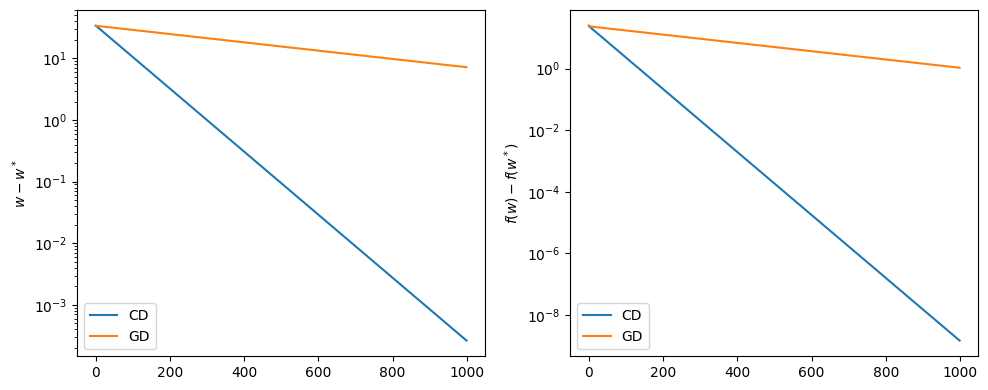

In [79]:
n_iter = 1000
step = 1 / np.linalg.norm(A, ord=2)

w_list = coordinate_descent(A, b, n_iter * p)
w_list_gd = gradient_descent(A, b, n_iter, step)

w_star = np.linalg.solve(A, b)
f_star = f(w_star)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].semilogy(np.linalg.norm((w_list - w_star)[::p], axis=1), label='CD')
axes[0].semilogy(np.linalg.norm(w_list_gd - w_star, axis=1), label='GD')
axes[0].legend()
axes[0].set_ylabel(r'$w - w^*$')
axes[1].semilogy(np.array([f(w) - f_star for w in w_list][::p]), label='CD')
axes[1].semilogy(np.array([f(w) - f_star for w in w_list_gd]), label='GD')
axes[1].legend()
axes[1].set_ylabel(r'$f(w) - f(w^*)$')
plt.tight_layout()
plt.show()

In [50]:
%timeit coordinate_descent(A, b, n_iter * p)
%timeit gradient_descent(A, b, n_iter, step)

48 ms ± 1.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.37 ms ± 19.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Question 4:** We can add a step-size $\gamma$ in the coordinate descent method. The updated coordinate becomes:
$$w_i^{t+1} = w_i^t - \gamma \frac{1}{A_{ii}}(\sum_{j}A_{ij}w_j^t - b_i).$$
Test the influence of the step-size on convergence.

In [80]:
def coordinate_descent_2(A, b, n_iters, step):
    _, p = A.shape
    w = np.zeros(p)
    w_list = []
    for t in range(n_iters):
        w_list.append(w.copy())
        i = t % p
        w[i] -= step * (A[i].dot(w) - b[i]) / A[i, i]
    return np.array(w_list)

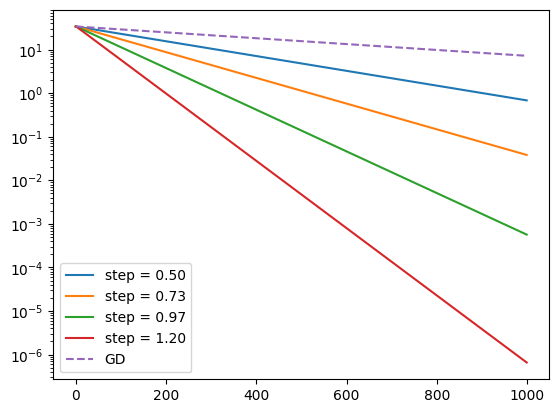

In [81]:
stepsizes = np.linspace(0.5, 1.2, 4)

fig, ax = plt.subplots()
for step in stepsizes:
    w_list = coordinate_descent_2(A, b, n_iter * p, step)
    ax.semilogy(np.linalg.norm((w_list - w_star)[::p], axis=1), label='step = %.2f' % step)
ax.semilogy(np.linalg.norm(w_list_gd - w_star, axis=1), label='GD', linestyle='--')
ax.legend()
plt.show()